# Power of Feature Engineering

比较逻辑回归与 DNN 分类器在非线性数据集上的性能。这表明，通过对数据进行转换，使用逻辑回归可以获得与 DNN 相似的准确性。

## Prepare Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
n_points = 2000

age = np.round(np.linspace(18, 60, n_points), 2) # age of employee
np.random.shuffle(age) # shuffle

performance = np.linspace(-10, 10, n_points) # performance score of employee
np.random.shuffle(performance) # shuffle

noise = np.random.randn(n_points)

g = (100 * age) + 200 * (performance) + 500 * age / performance - 10000 + 500 * noise
y = [1 if y >= 0 else 0 for y in g]

data = pd.DataFrame(data = {'age': age, 'performance': performance, 'y': y})

print(sum(y))
data.head()

459


,age,performance,y
0,49.45,1.395698,1
1,37.22,-6.478239,0
2,57.75,-3.366683,0
3,52.58,-9.689845,0
4,24.53,-6.408204,0


In [3]:
data.to_csv('./dataset/performance.csv')

In [4]:
data = pd.read_csv('./dataset/performance.csv')
sum(data['y'])

459

In [5]:
data.iloc[0]

Unnamed: 0      0.000000
age            49.450000
performance     1.395698
y               1.000000
Name: 0, dtype: float64

In [6]:
data.loc[0]

Unnamed: 0      0.000000
age            49.450000
performance     1.395698
y               1.000000
Name: 0, dtype: float64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

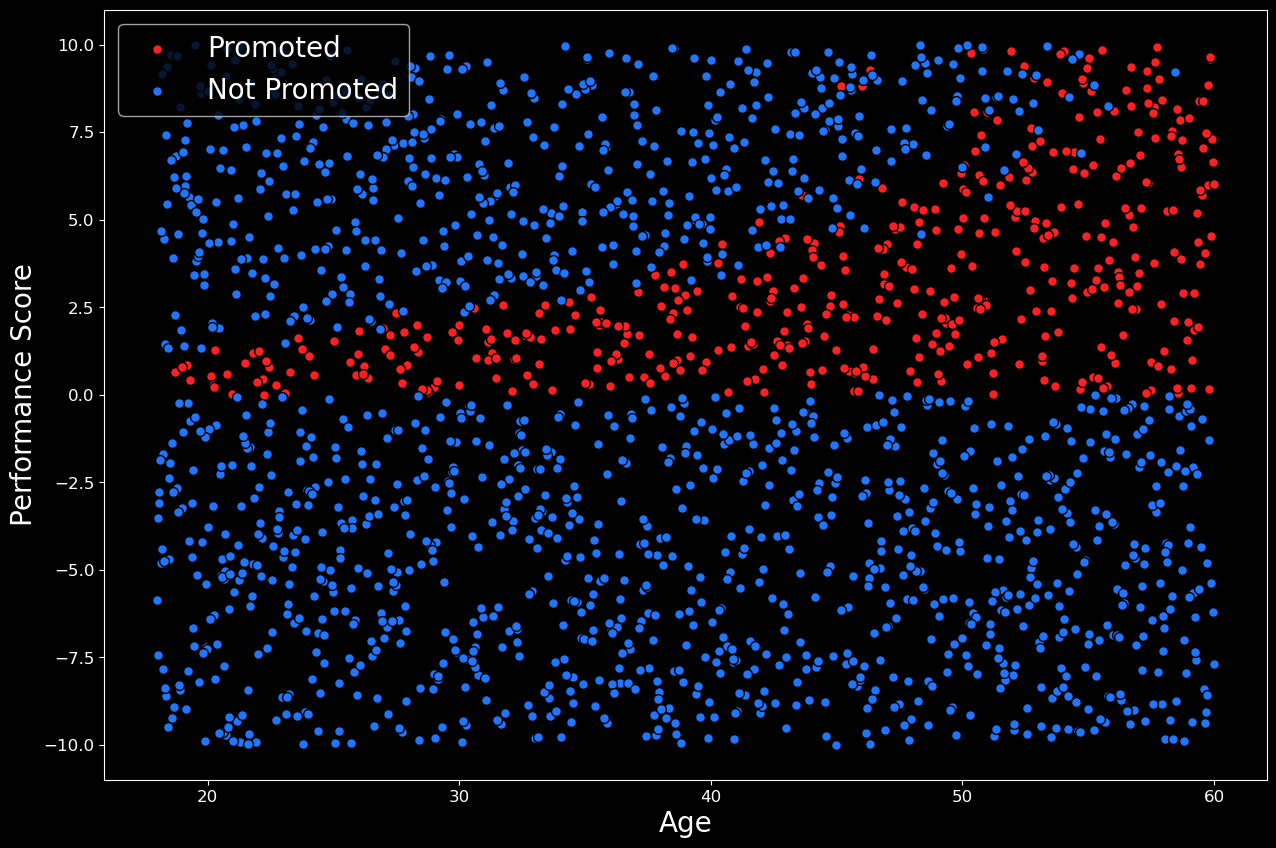

In [8]:
plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10))

plt.scatter('age', 'performance', c = '#ff2121', s = 50, edgecolors = '#000000', data = data[data.y == 1])
plt.scatter('age', 'performance', c = '#2176ff', s = 50, edgecolors = '#000000', data = data[data.y == 0])
plt.ylabel('Performance Score', size = 20)
plt.xlabel('Age', size = 20)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.legend(['Promoted', 'Not Promoted'], loc = 2, prop = {'size': 20})
plt.savefig('../figures/article_feature_eng/figure1.png', format = 'png')


## Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import statsmodels.api as sm

In [10]:
x = data[['age', 'performance']]
x = sm.add_constant(x)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2024)

model = sm.Logit(y_train, x_train).fit() # fit logistic regression model

predictions = np.around(model.predict(x_test))
accuracy = metric.accuracy_score(y_test, predictions)

print(round(accuracy * 100, 2))

Optimization terminated successfully.
         Current function value: 0.437629
         Iterations 7
79.67


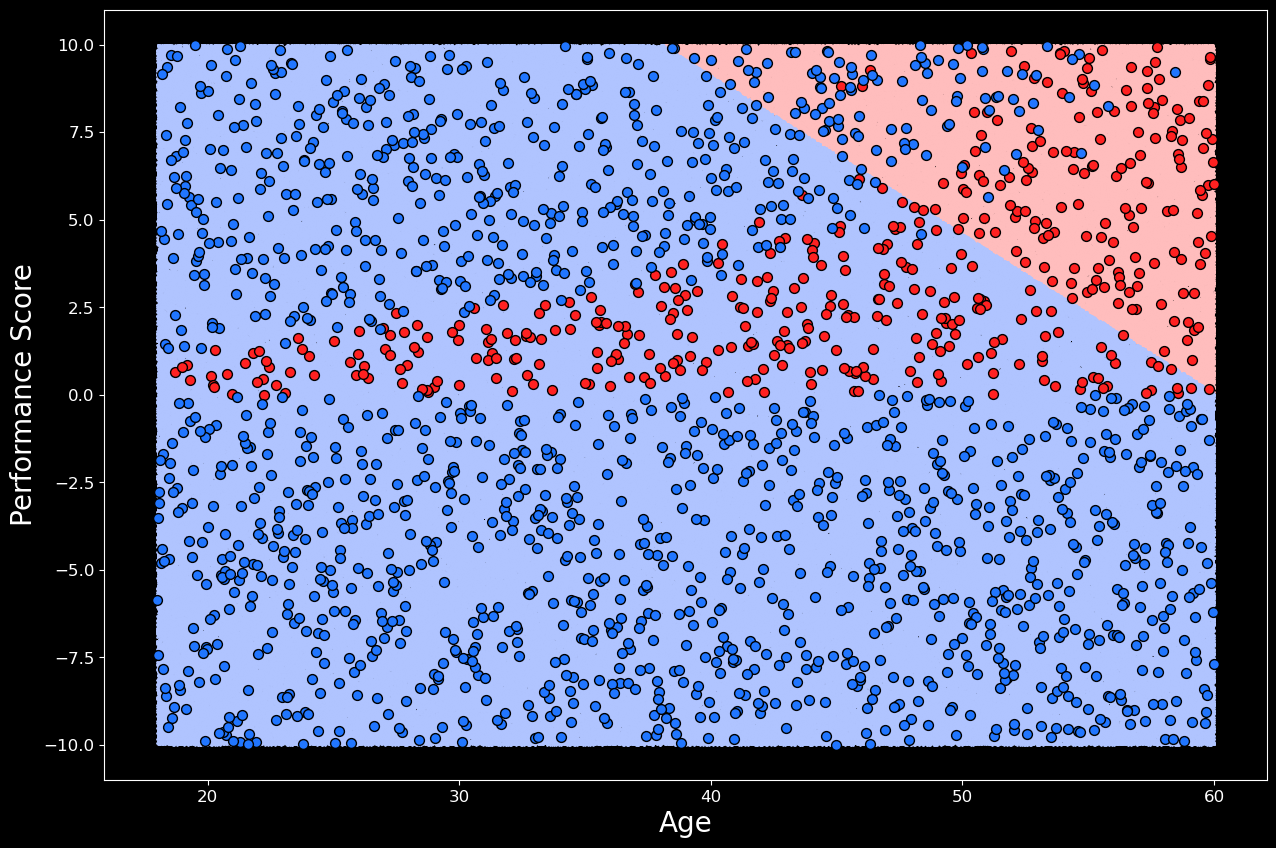

In [11]:
n_points = 1000000 # use many point to visualise decision boundry

age_db = np.linspace(18, 60, n_points)
np.random.shuffle(age_db)

performance_db = np.linspace(-10, 10, n_points)
np.random.shuffle(performance_db)

data_db = pd.DataFrame({'age': age_db, 'performance': performance_db})
data_db = sm.add_constant(data_db)

# make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions]
data_db['y'] = y_db

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10))

# Plot decision boundry
plt.scatter('age', 'performance', c = '#ffbdbd', s = 1, data = data_db[data_db.y == 1])
plt.scatter('age', 'performance', c = '#b0c4ff', s = 1, data = data_db[data_db.y == 0])

# Plot employee data points
plt.scatter('age', 'performance', c = '#ff2121', s = 50, edgecolors = '#000000', data = data[data.y == 1])
plt.scatter('age', 'performance', c = '#2176ff', s = 50, edgecolors = '#000000', data = data[data.y == 0])
plt.ylabel('Performance Score', size = 20)
plt.xlabel('Age', size = 20)
plt.yticks(size = 12)
plt.xticks(size = 12)

plt.savefig('../figures/article_feature_eng/figure2.png', format = 'png')

## Add transformations and interactions

In [12]:
data['age_perf_ratio'] = age / performance

x = data[['age', 'performance', 'age_perf_ratio']]
x = sm.add_constant(x)
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2024)

model = sm.Logit(y_train, x_train).fit() # fit new logistic regression model

predictions = np.around(model.predict(x_test))
accuracy = metric.accuracy_score(y_test, predictions)

print(round(accuracy * 100, 2))

Optimization terminated successfully.
         Current function value: 0.061103
         Iterations 17
97.67


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [13]:
model.summary()

/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                  0.8886
Time:                        16:42:17   Log-Likelihood:                -85.544
converged:                       True   LL-Null:                       -768.04
Covariance Type:            nonrobust   LLR p-value:                1.168e-295
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -33.2361      4.350     -7.640      0.000     -41.762     -24.710
age                0.3129      0.046      6.731      0.000       0.222       0.404
performance        0.7956      0.302      2.631      0.009       0.203       1.388
age_perf_ratio     1.6539      0.264      6.273      0.000       1.137       2.171
==================================================================================

Possibly complete quasi-separation: A fraction 0.73 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


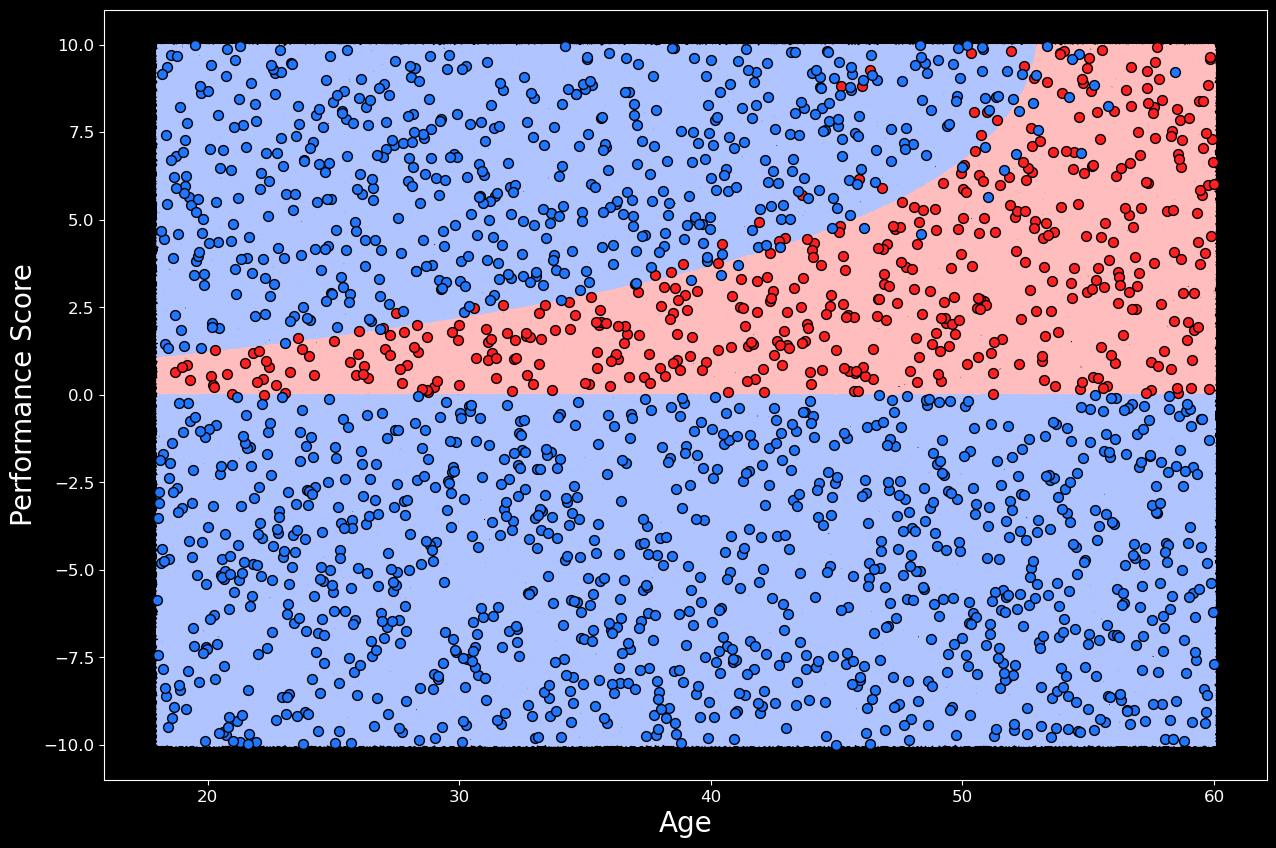

In [14]:
# Update decision boundry points
data_db.drop('y',axis=1,inplace=True)
data_db['age_perf_ratio'] = data_db['age']/data_db['performance']
sm.add_constant(data_db)

# make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

# Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

# Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('../figures/article_feature_eng/figureFinal.png',format='png', dpi=150)


## ANN Classifier

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
x = data[['age', 'performance']]
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2024)

model = Sequential()

model.add(Dense(20, input_dim = 2, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 100, batch_size = 10) # fit ANN

accuracy = model.evaluate(x_test, y_test)
print(round(accuracy[1] * 100, 2))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-07-01 16:42:23.257002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-01 16:42:23.257428: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2024-07-01 16:42:23.484346: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-01 16:42:23.633550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - 1s 4ms/step - loss: 1.0908 - accuracy: 0.6536
Epoch 2/100
140/140 [==============================] - 1s 4ms/step - loss: 0.4716 - accuracy: 0.7600
Epoch 3/100
140/140 [==============================] - 1s 4ms/step - loss: 0.3767 - accuracy: 0.8336
Epoch 4/100
140/140 [==============================] - 1s 6ms/step - loss: 0.3081 - accuracy: 0.8679
Epoch 5/100
140/140 [==============================] - 1s 5ms/step - loss: 0.2691 - accuracy: 0.9000
Epoch 6/100
140/140 [==============================] - 1s 4ms/step - loss: 0.2427 - accuracy: 0.9014
Epoch 7/100
140/140 [==============================] - 1s 4ms/step - loss: 0.2265 - accuracy: 0.9114
Epoch 8/100
140/140 [==============================] - 1s 4ms/step - loss: 0.2173 - accuracy: 0.9150
Epoch 9/100
140/140 [==============================] - 1s 4ms/step - loss: 0.2096 - accuracy: 0.9171
Epoch 10/100
140/140 [==============================] - 1s 4ms/step - loss: 0.2067 - accuracy: 0.9157
E

2024-07-01 16:43:35.475089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 9ms/step - loss: 0.0823 - accuracy: 0.9683
96.83


  115/31250 [..............................] - ETA: 41s

2024-07-01 16:43:35.893246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31250/31250 [==============================] - 43s 1ms/step


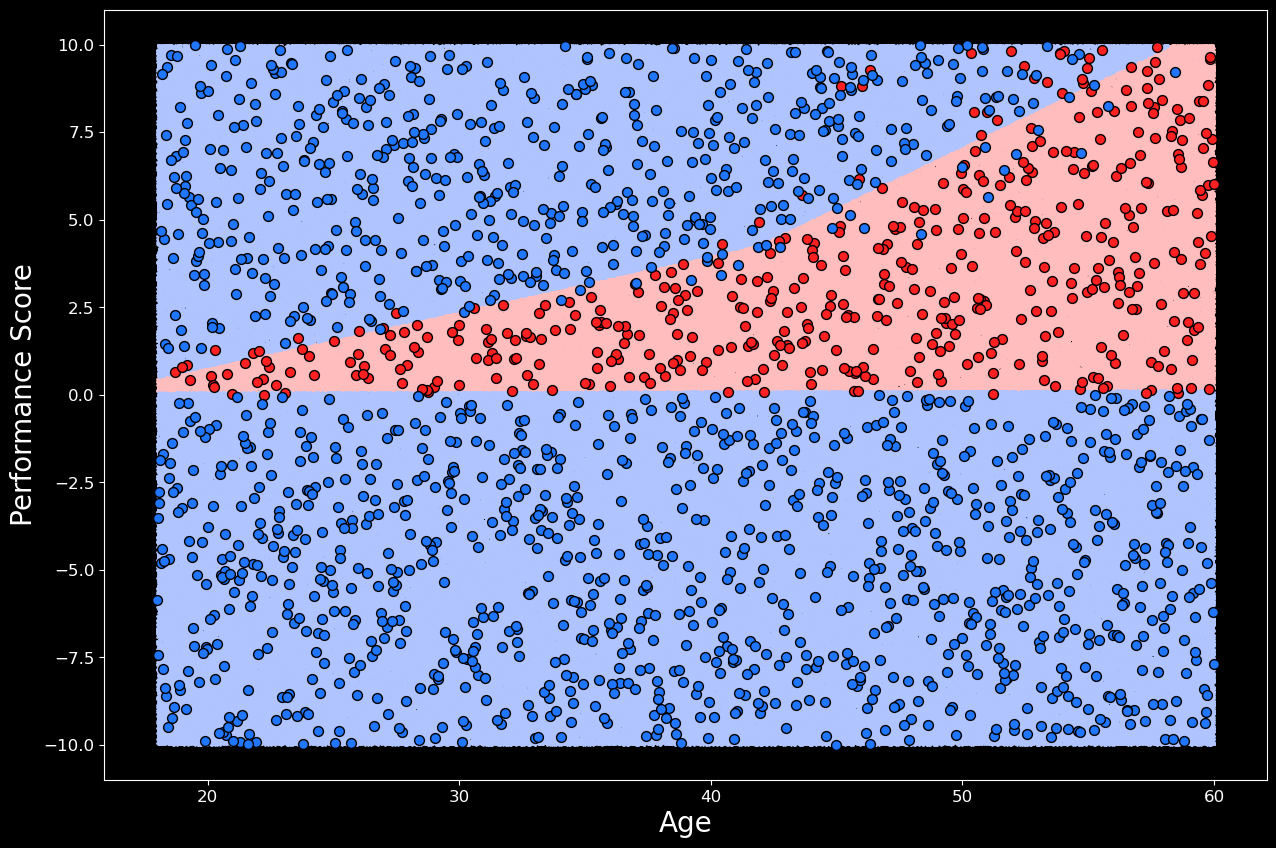

In [17]:
# make predictions on the decision boundry points
predictions = model.predict(data_db[['age','performance']])
y_db = np.around(predictions)
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

# Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

# Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('../figures/article_feature_eng/figure_ann.png',format='png')